# Credit cards Fraud Detection

## Objetivo

Analizar los datos de un dataset para predecir el costo de un seguro médico.

## Ejecución

### Imports

In [23]:
import sys;
assert sys.version_info >= (3, 5);
import sklearn;
assert sklearn.__version__ >= "0.20";
import numpy as np;
import math;
import os;
import matplotlib as mpl;
import matplotlib.pyplot as plt;
import pandas as pd;
import seaborn as sns;
from scipy import stats;
from scipy.stats import norm;
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Datos

#### Carga de datos

In [24]:
# dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv(filepath_or_buffer="dataset/creditcard_sin_outliers.csv")
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Exploración de datos

Esta primera aproximación nos permite ver que tenemos 31 columas, de las cuales 1 es int y el resto son float. Además, podemos ver que no tenemos valores nulos.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225562 entries, 0 to 225561
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  225562 non-null  int64  
 1   Time        225562 non-null  float64
 2   V1          225562 non-null  float64
 3   V2          225562 non-null  float64
 4   V3          225562 non-null  float64
 5   V4          225562 non-null  float64
 6   V5          225562 non-null  float64
 7   V6          225562 non-null  float64
 8   V7          225562 non-null  float64
 9   V8          225562 non-null  float64
 10  V9          225562 non-null  float64
 11  V10         225562 non-null  float64
 12  V11         225562 non-null  float64
 13  V12         225562 non-null  float64
 14  V13         225562 non-null  float64
 15  V14         225562 non-null  float64
 16  V15         225562 non-null  float64
 17  V16         225562 non-null  float64
 18  V17         225562 non-null  float64
 19  V1

Estos datos a priori no nos dicen mucho, pero podemos ver que tenemos 30 columnas que son los datos de entrada y la columna parece que valor binario por lo que podemos suponer que es la columna que queremos predecir.

In [26]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,...,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000
mean,140406.616833,93596.146674,0.227036,0.077263,0.034995,0.315139,0.044173,-0.072983,0.070641,0.001302,...,0.005547,-0.019060,0.002269,0.003051,-0.009133,0.023840,-0.003737,0.002680,80.984564,0.002181
std,82295.380990,47489.199537,1.551206,1.208383,1.420860,1.146834,1.148792,1.180068,0.993598,0.878302,...,0.574012,0.697856,0.426905,0.576250,0.493902,0.472935,0.283297,0.181652,184.669831,0.046653
min,0.000000,0.000000,-30.552380,-8.494104,-31.103685,-1.399981,-22.105532,-6.406267,-43.557242,-41.044261,...,-22.797604,-8.887017,-19.254328,-2.097638,-4.781606,-1.199587,-7.263482,-1.896821,0.000000,0.000000
25%,69412.250000,53411.000000,-0.777985,-0.478365,-0.848517,-0.548372,-0.602632,-0.780557,-0.459546,-0.209065,...,-0.225378,-0.562337,-0.151022,-0.333871,-0.319737,-0.310975,-0.070998,-0.049747,4.990000,0.000000
50%,138314.000000,82591.500000,0.326761,0.125880,0.192591,0.190394,-0.009432,-0.308966,0.086265,0.006922,...,-0.025841,-0.016718,-0.009181,0.044116,0.008224,-0.000441,-0.004966,0.011664,20.000000,0.000000
75%,211717.750000,138533.750000,1.338111,0.837136,1.021007,0.873541,0.613231,0.308576,0.596738,0.278862,...,0.183734,0.500415,0.140379,0.424154,0.334906,0.257173,0.078407,0.073159,74.000000,0.000000
max,284806.000000,172792.000000,2.366096,22.057729,4.187811,12.114672,11.095089,6.481326,12.735925,20.007208,...,27.202839,8.361985,5.485748,1.099542,2.297135,2.790437,3.063540,1.798764,3465.660000,1.000000


Con los histogramas no vemos distribuciones muy normales

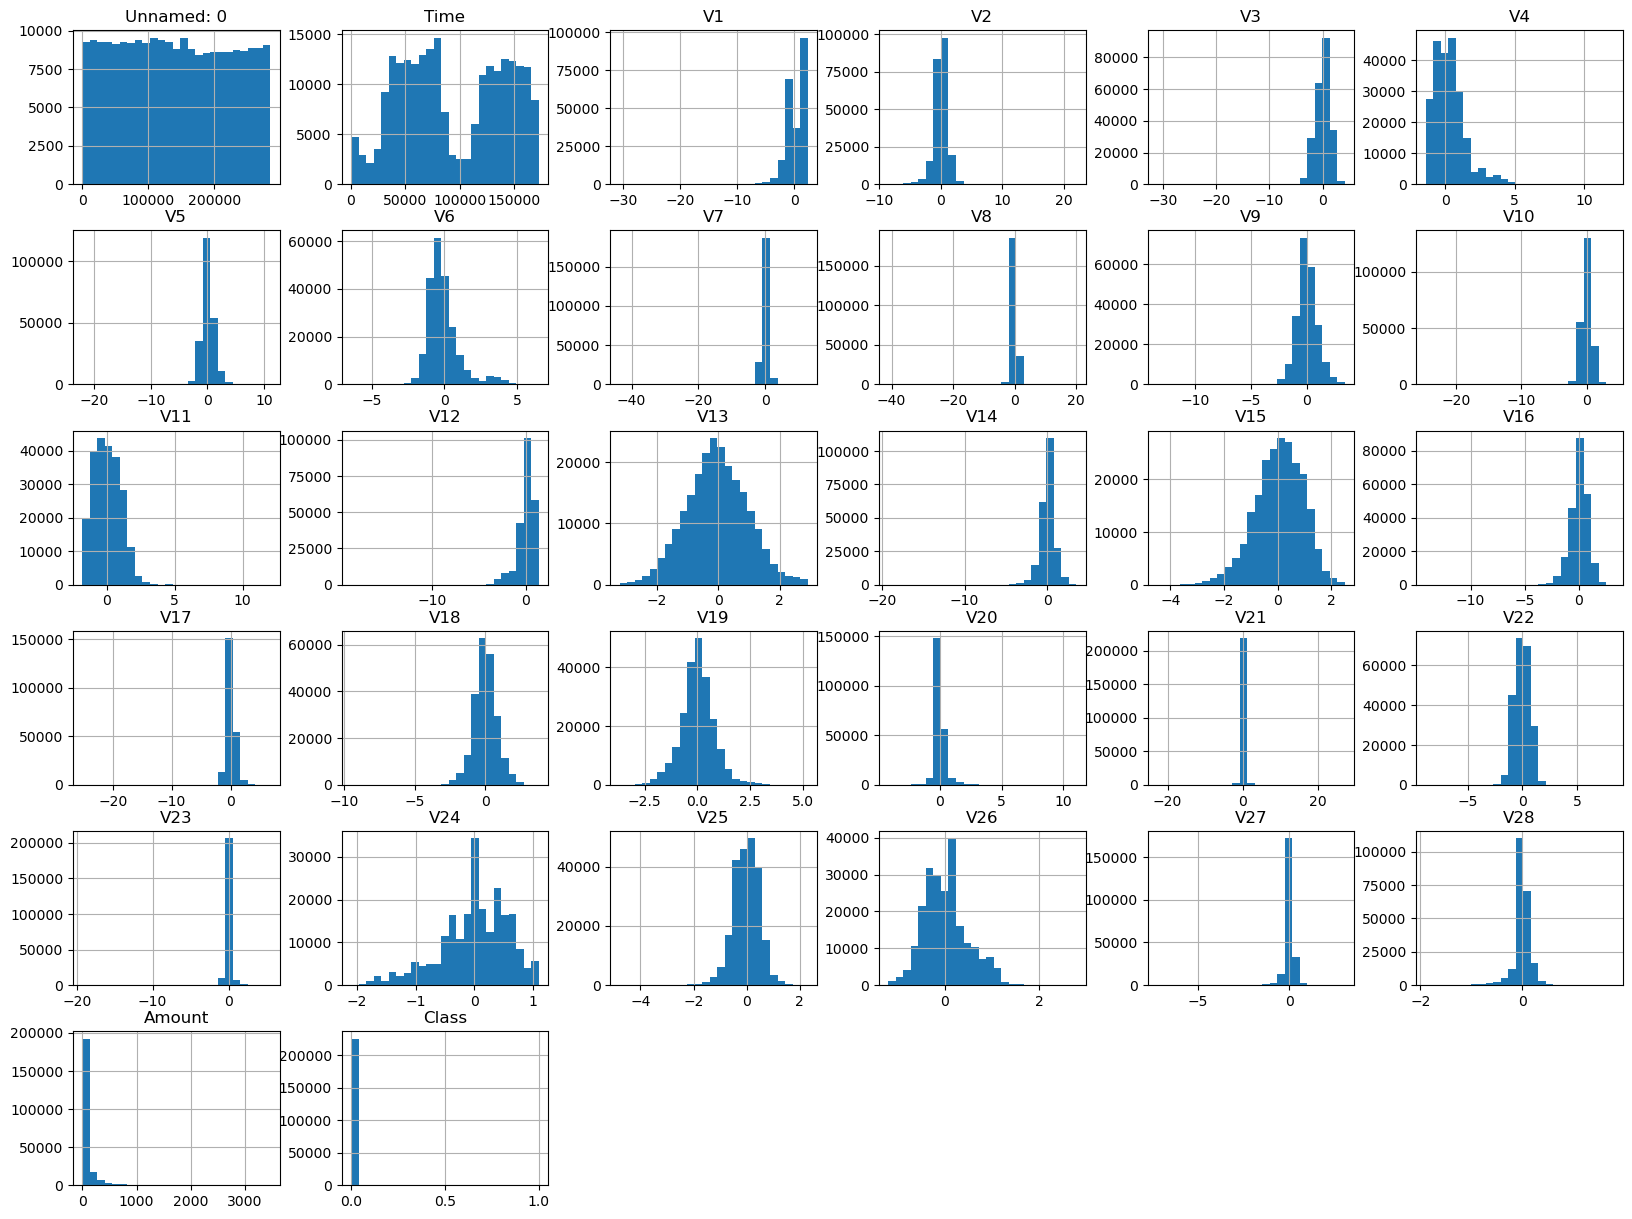

In [27]:
df.hist(bins=25, figsize=(20,15))
plt.show()

También parece que casi todos los datos de la columna `Class` están en 0, lo que es un claro problema para el aprendizaje.

In [28]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.78 % of the dataset
Frauds 0.22 % of the dataset


#### Eliminar Outliers

```python
df_copy = df.copy()
df = df_copy.copy()
print(df["Class"].value_counts())
for i in range(1, 29):
    fraudes = df["Class"].value_counts()[1]
    print("V"+str(i)+" start")
    for j in range(-600, 10):
        df = df[df['V'+str(i)].between(-30, -j/10)]

        if fraudes > df["Class"].value_counts()[1]:
            df = df_copy
            break
        else:
            df_copy = df
    print("V"+str(i)+" negative")
    for j in range(-600, 10):
        df = df[df['V'+str(i)].between(j/10, 30)]

        if fraudes > df["Class"].value_counts()[1]:
            df = df_copy
            break
        else:
            df_copy = df
    print("V"+str(i)+" finished")

print(df["Class"].value_counts())

```


#### Borrar datos sobrantes

In [29]:
df = df.drop(['Time'], axis=1)
df = df.drop(['Amount'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)

fraudes = df[df['Class'] == 1].copy()
no_fraudes = df[df['Class'] == 0].copy()

no_fraudes = sklearn.utils.shuffle(no_fraudes)
no_fraudes = no_fraudes.sample(len(fraudes)*10)

df2 = pd.concat([fraudes, no_fraudes], axis=0)
df2 = sklearn.utils.shuffle(df2)

In [30]:
# see the number of rows
print(len(df2))

5412


In [31]:
x = df2.drop(['Class'], axis=1)
y = df2['Class']

#### PCA

In [32]:
from sklearn.decomposition import PCA
pca_x = PCA(n_components=2).fit_transform(x)
# pca_x to dataframe
pca_x_df = pd.DataFrame(data=pca_x, columns=['PC1', 'PC2'])

In [33]:
pca_x_df

,PC1,PC2
0,0.685188,7.517362
1,-1.845279,0.182567
2,-2.004732,-0.088974
3,-1.961145,0.188181
4,-1.633954,-0.541145
...,...,...
5407,13.074027,-4.728372
5408,-1.954415,-0.105072
5409,-1.863630,-0.244159
5410,-1.473400,-0.704385


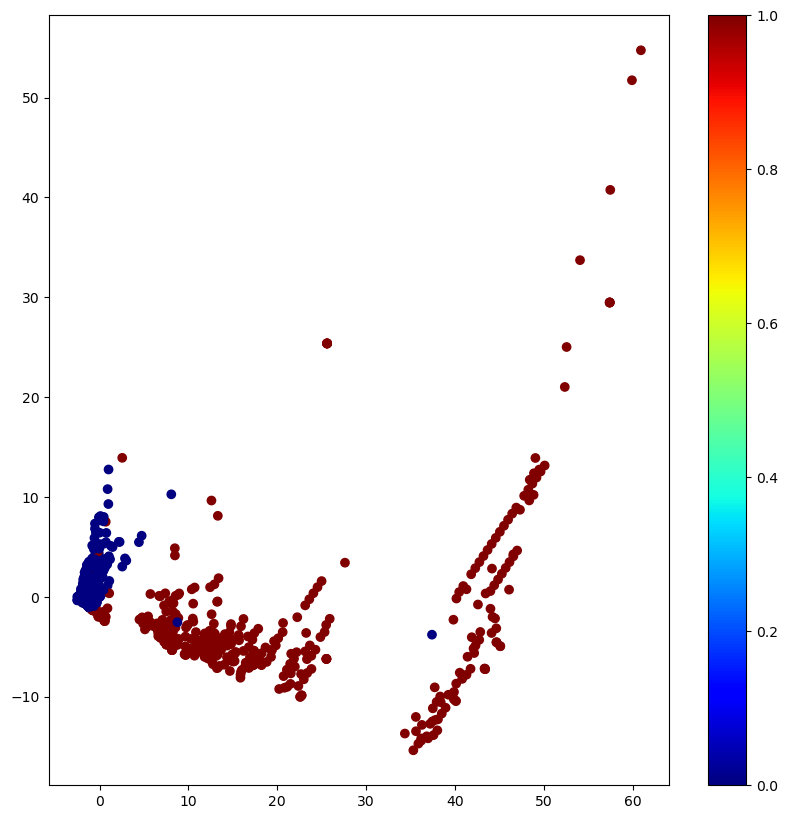

In [103]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()

#### KMeans

c:\Users\brais.fernandezvazqu\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


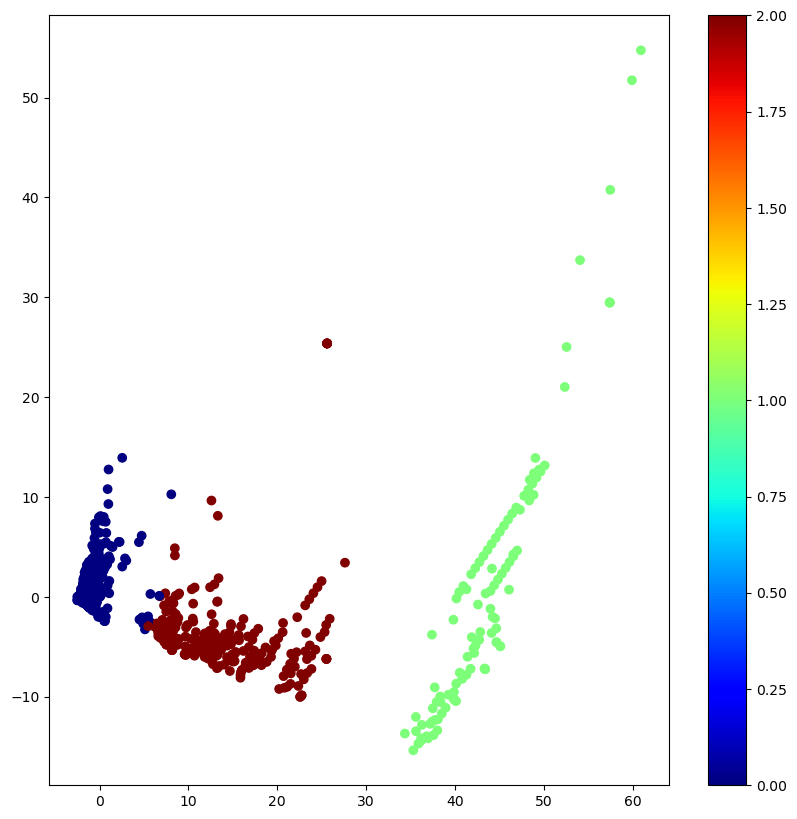

In [102]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
y_pred = kmeans.predict(x)

plt.figure(figsize=(10, 10))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_pred, cmap='jet')
plt.colorbar()
plt.show()


#### DBSCAN

In [114]:
# import dbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=6, min_samples=5)
predict = dbscan.fit(x)
y_pred = predict.labels_
y_pred

array([-1,  0,  0, ...,  0,  0,  0], dtype=int64)

In [69]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


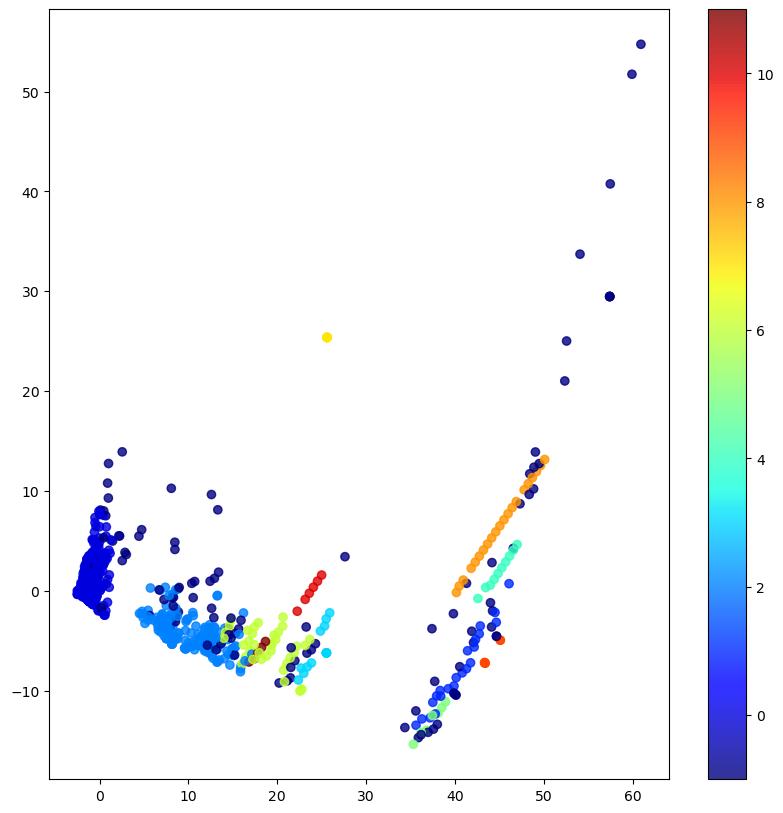

In [115]:
plt.figure(figsize=(10, 10))

#plot_dbscan(dbscan, pca_x, size=100)
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_pred, cmap='jet', alpha=0.8)
plt.colorbar()
plt.show()

#### Correlaciones

Con los datos categoricos pasados a numericos podemos observar correlaciones que en un principio no podíamos.

In [ ]:
corrmat = df2.corr().abs()
# show the correlation between the features class and Time
corrmat["Class"].sort_values(ascending=False)

Class    1.000000
V14      0.793646
V12      0.737841
V10      0.699219
V11      0.658312
V4       0.657296
V16      0.654172
V17      0.653486
V3       0.632896
V7       0.569563
V9       0.545332
V2       0.513543
V1       0.501389
V18      0.483731
V5       0.428988
V6       0.290375
V19      0.205036
V20      0.172299
V21      0.157052
V27      0.098337
V28      0.084087
V8       0.075616
V15      0.051697
V24      0.049894
V25      0.025547
V13      0.022849
V23      0.013274
V22      0.010935
V26      0.008637
Name: Class, dtype: float64

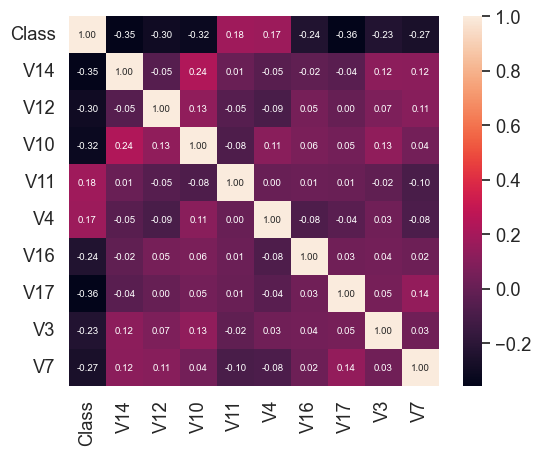

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()